In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./AttendanceMarksSA.csv')
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


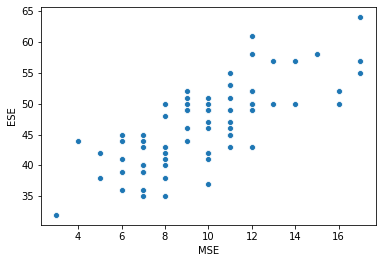

In [2]:
x = df['MSE']
y = df['ESE']
sns.scatterplot(x, y)

In [5]:
beta0 = 0
beta1 = 0
alpha = 0.01
count = 10000
n = float(len(x))

In [7]:
for i in range(count):
    yBar = beta1*x + beta0
    beta1 = beta1 - (alpha/n) * sum(x*(yBar - y))
    beta0 = beta0 -(alpha/n) * sum(yBar - y)
print(beta0, beta1)

30.66113097444092 1.6326392534114609


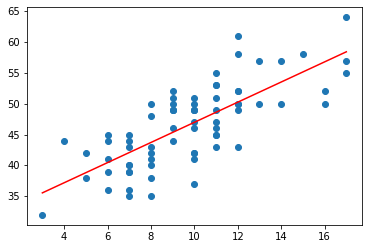

In [8]:
yBar = beta1*x + beta0

plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(yBar), max(yBar)], color='red')
plt.show()

### Find Standard Error

In [10]:
import math
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))
    
    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

rse = RSE(df['ESE'], yBar)
print(rse)

4.3962248281750655


### Implementing Gradient Descent Alogorithm using sci-kit Learn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
x = np.array(df['MSE']).reshape(-1,1)
y = np.array(df['ESE']).reshape(-1,1)

lr = LinearRegression()
lr.fit(x, y)

print(lr.coef_)
print(lr.intercept_)

yp = lr.predict(x)
rse = RSE(y, yp)


print(rse)


[[1.63215164]]
[30.66635246]
4.396224549647787
